
[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


/var/folders/3j/7f0xfyh52sj947j5n_g79l2m0000gp/T/ipykernel_49205/2138895859.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


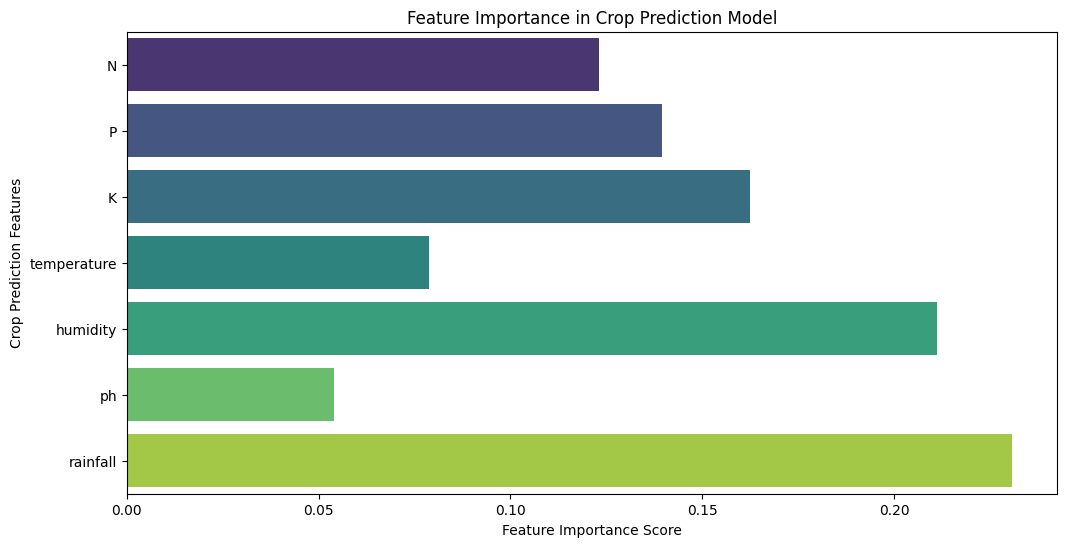

Optimized Crop Recommendation Model Accuracy: 99.18%

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        10
      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        14
      grapes       1.00      1.00      1.00         7
        jute       0.88      0.94      0.91        16
 kidneybeans       1.00      1.00      1.00        21
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        14
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        19
   

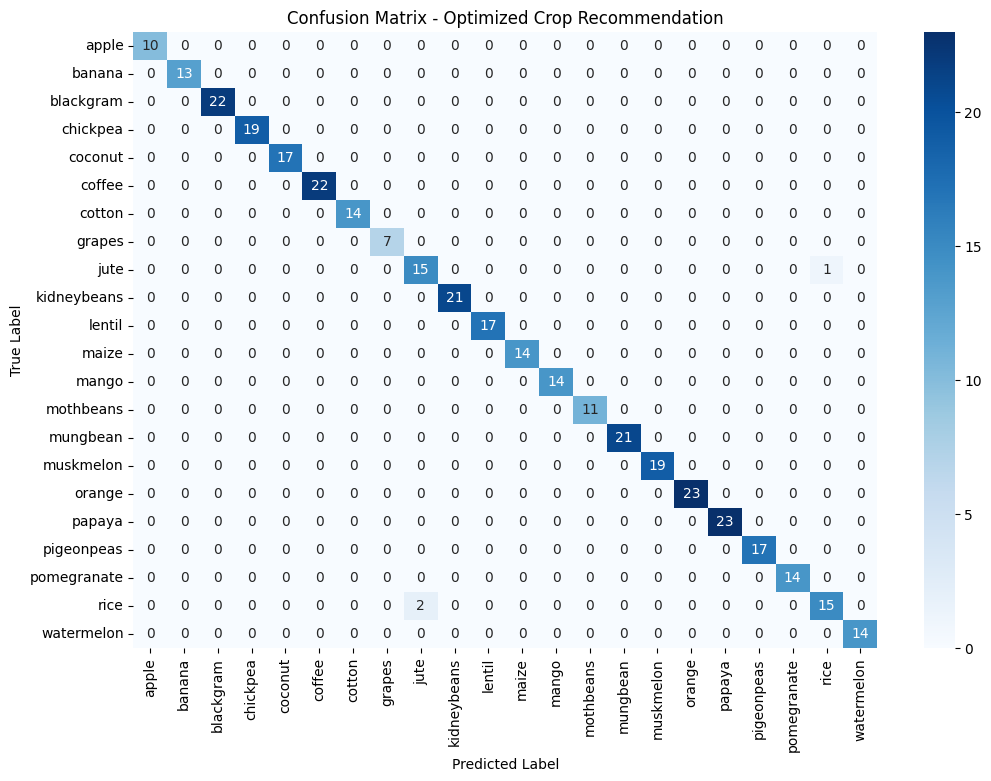

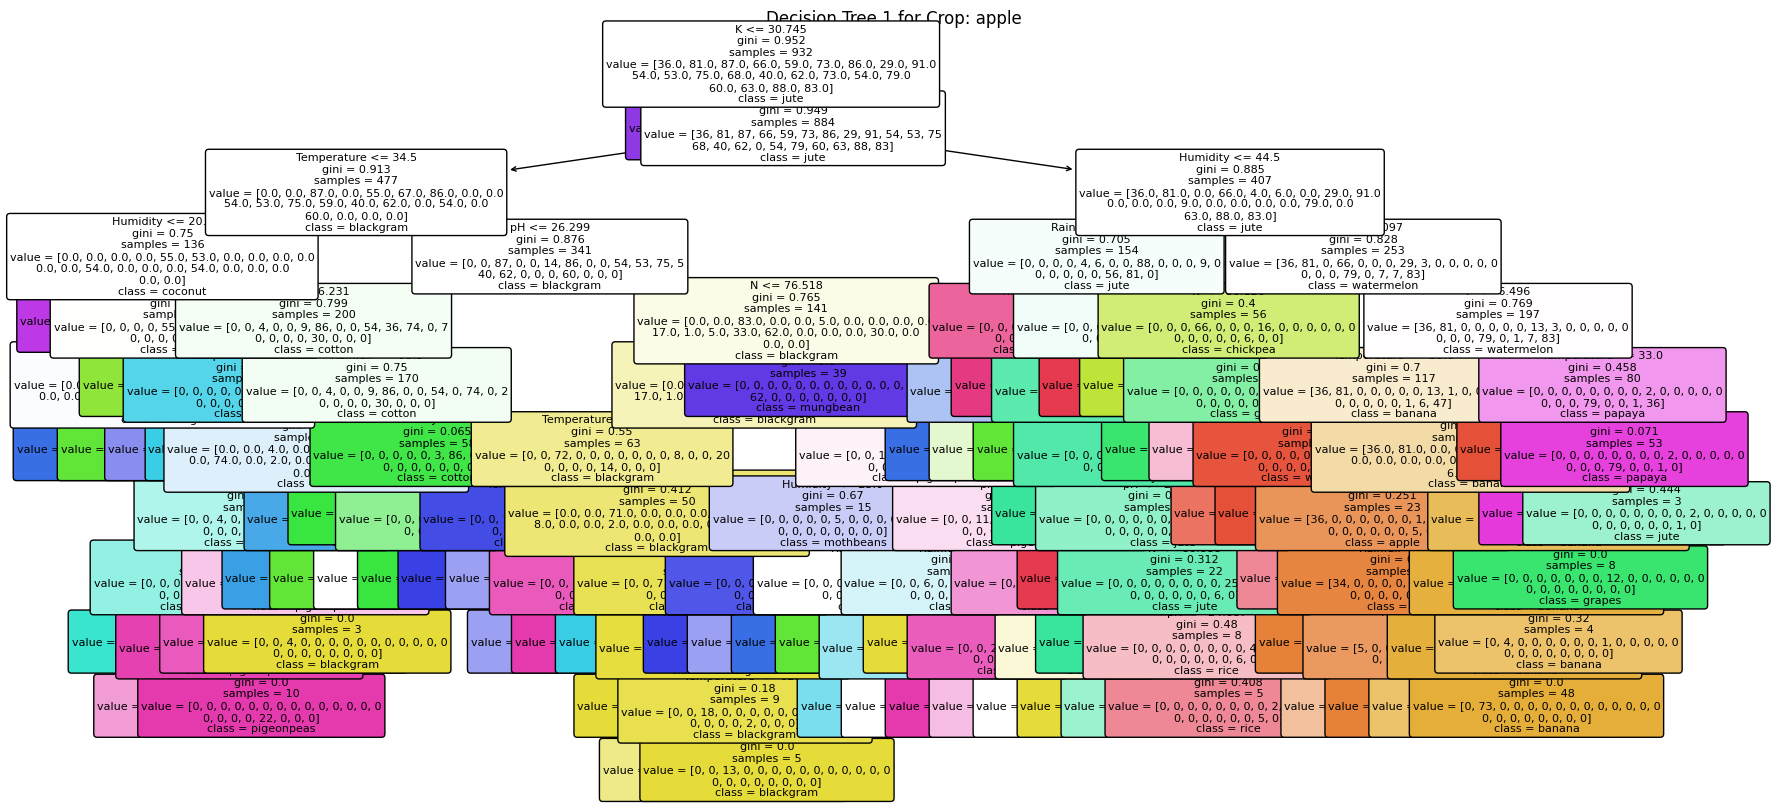

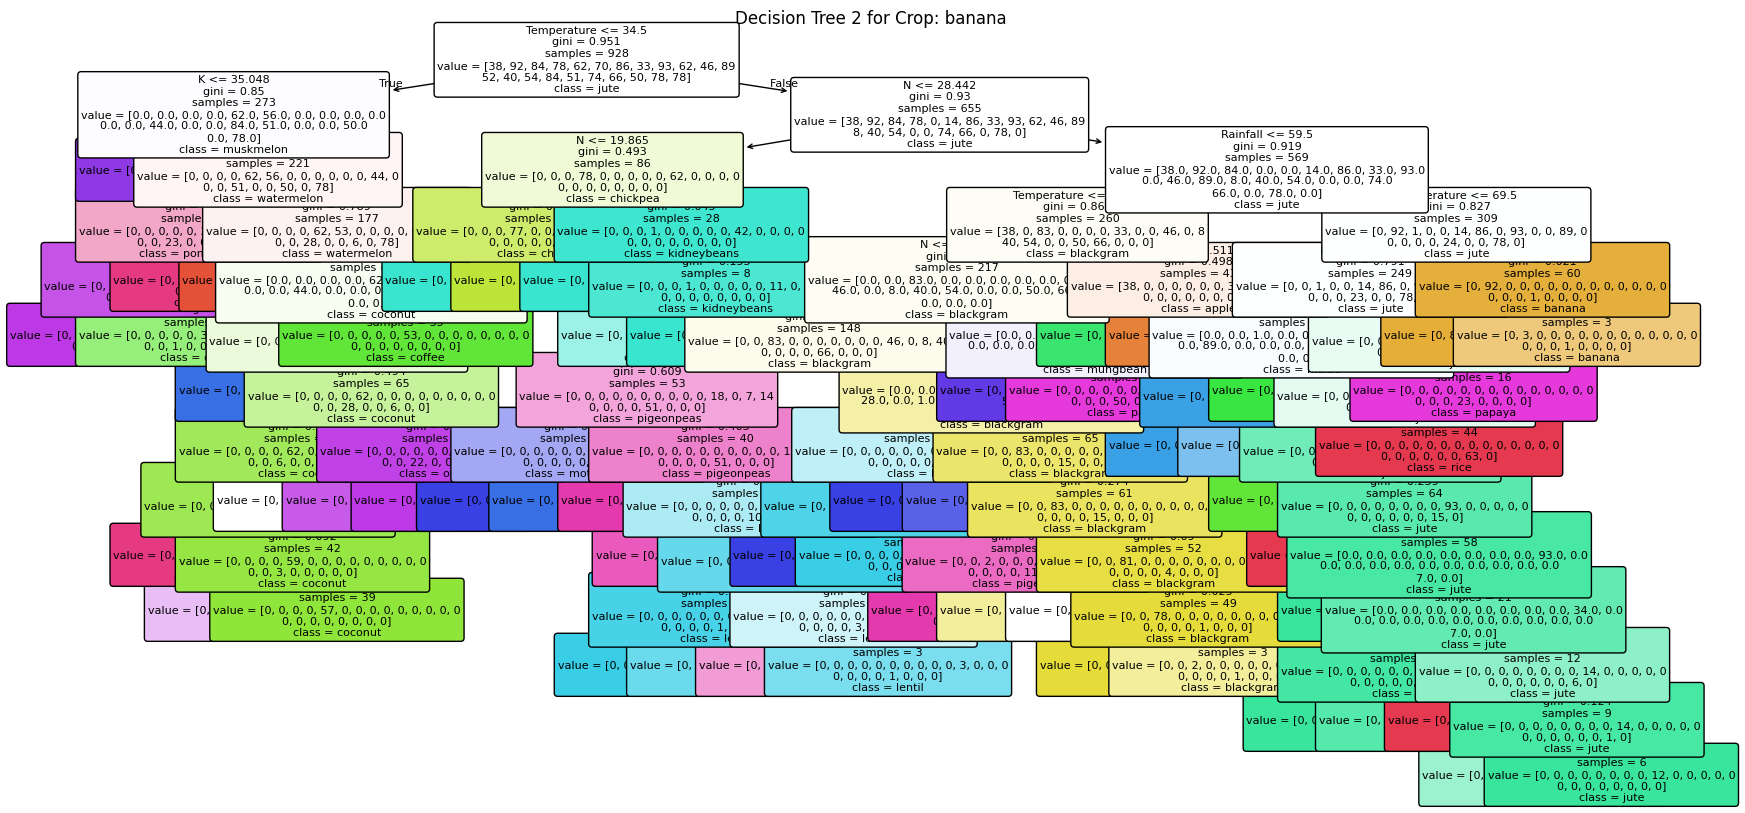

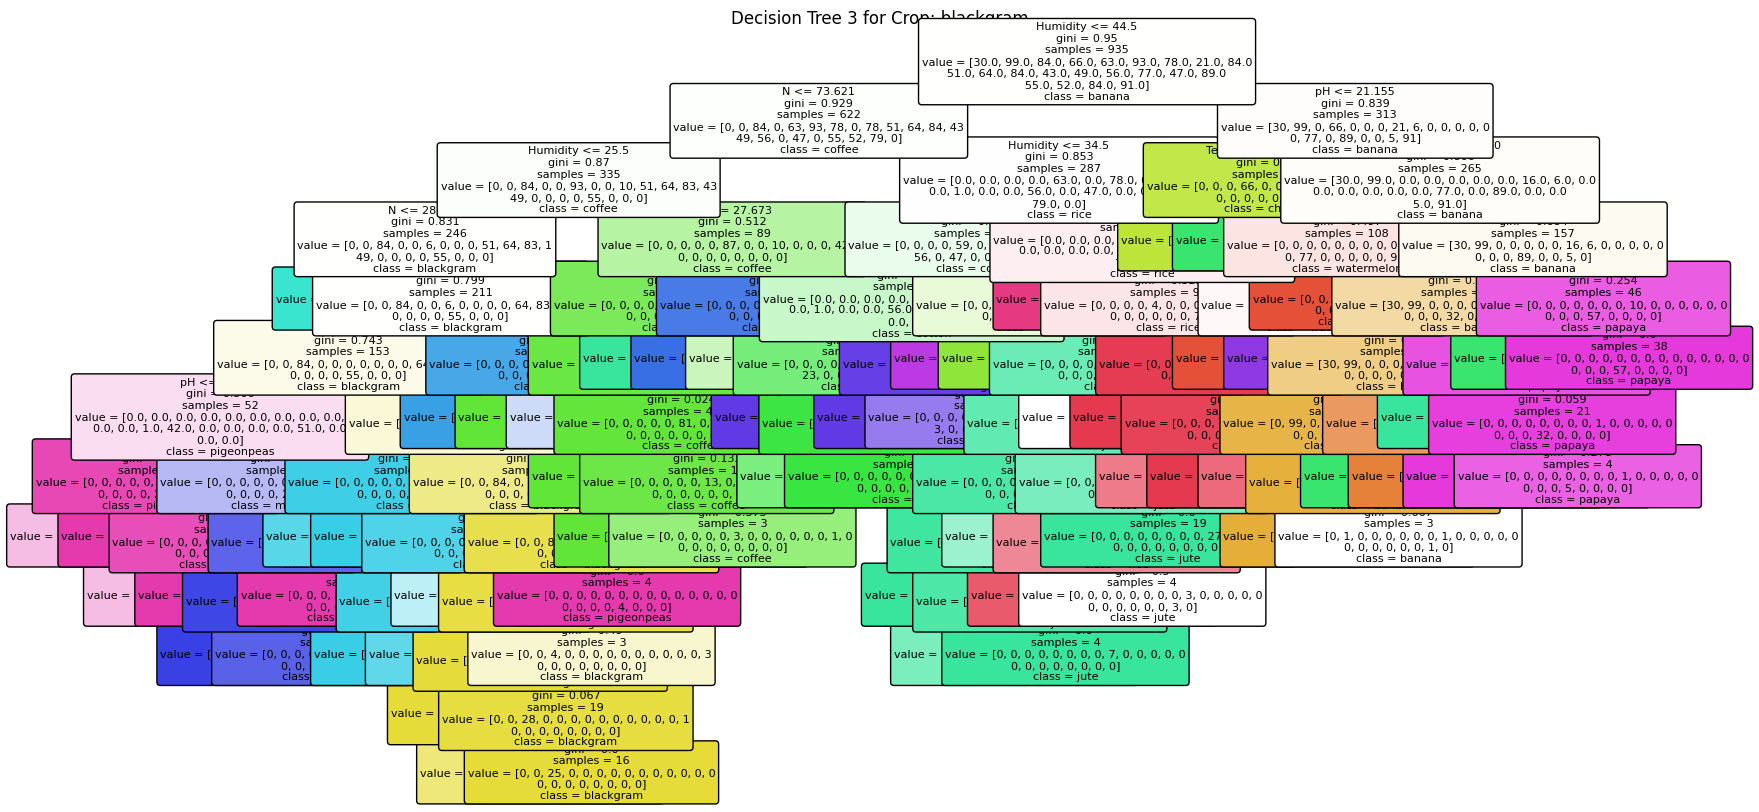

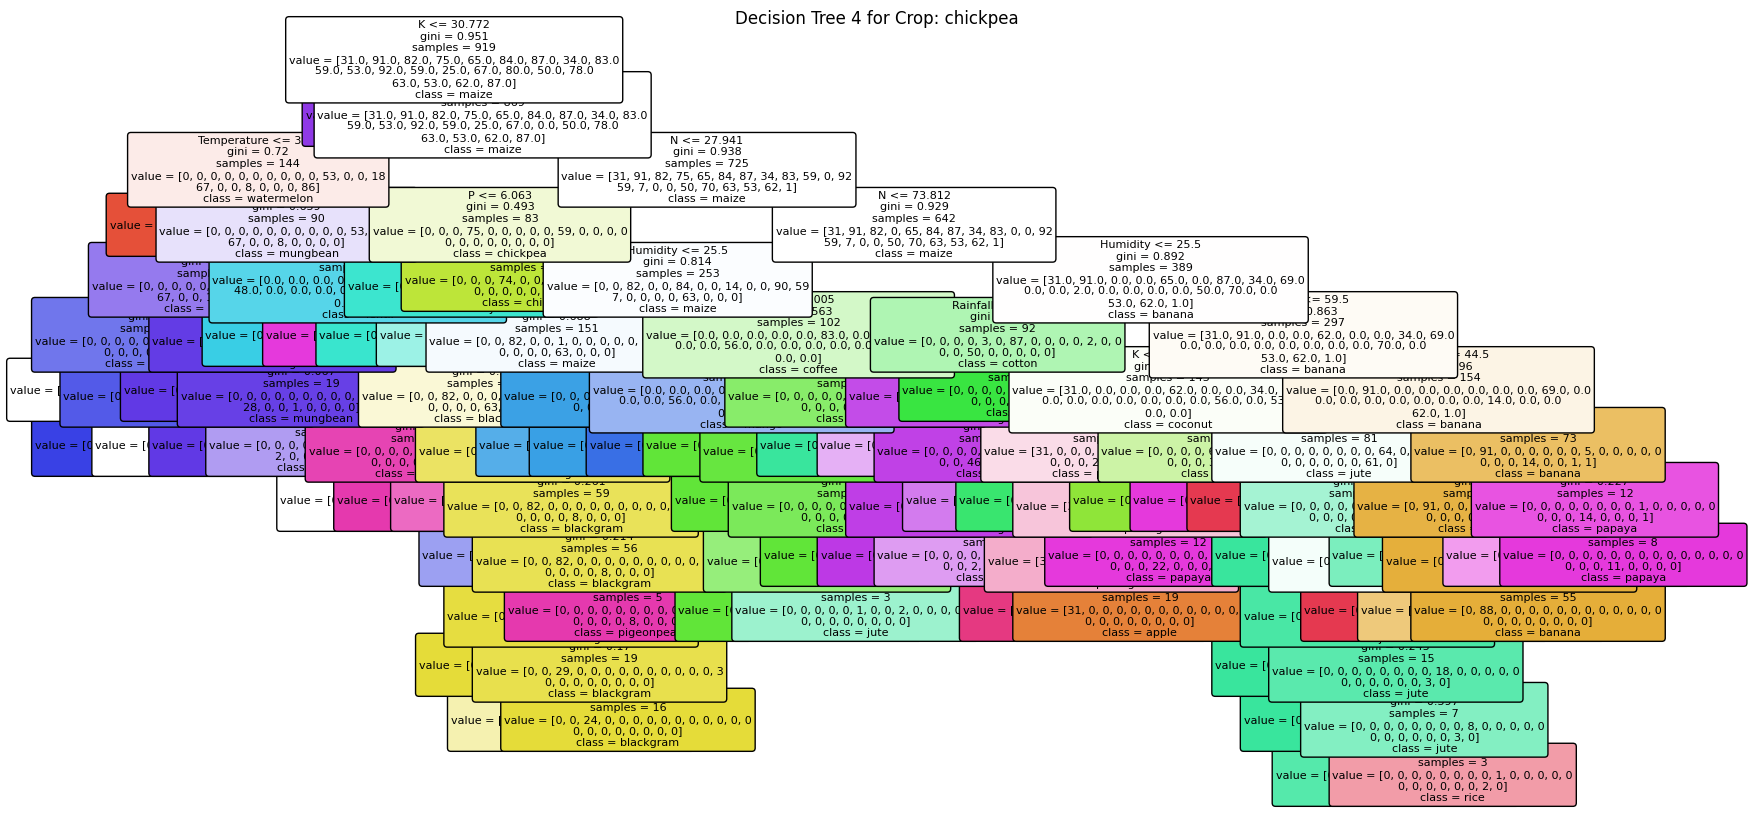

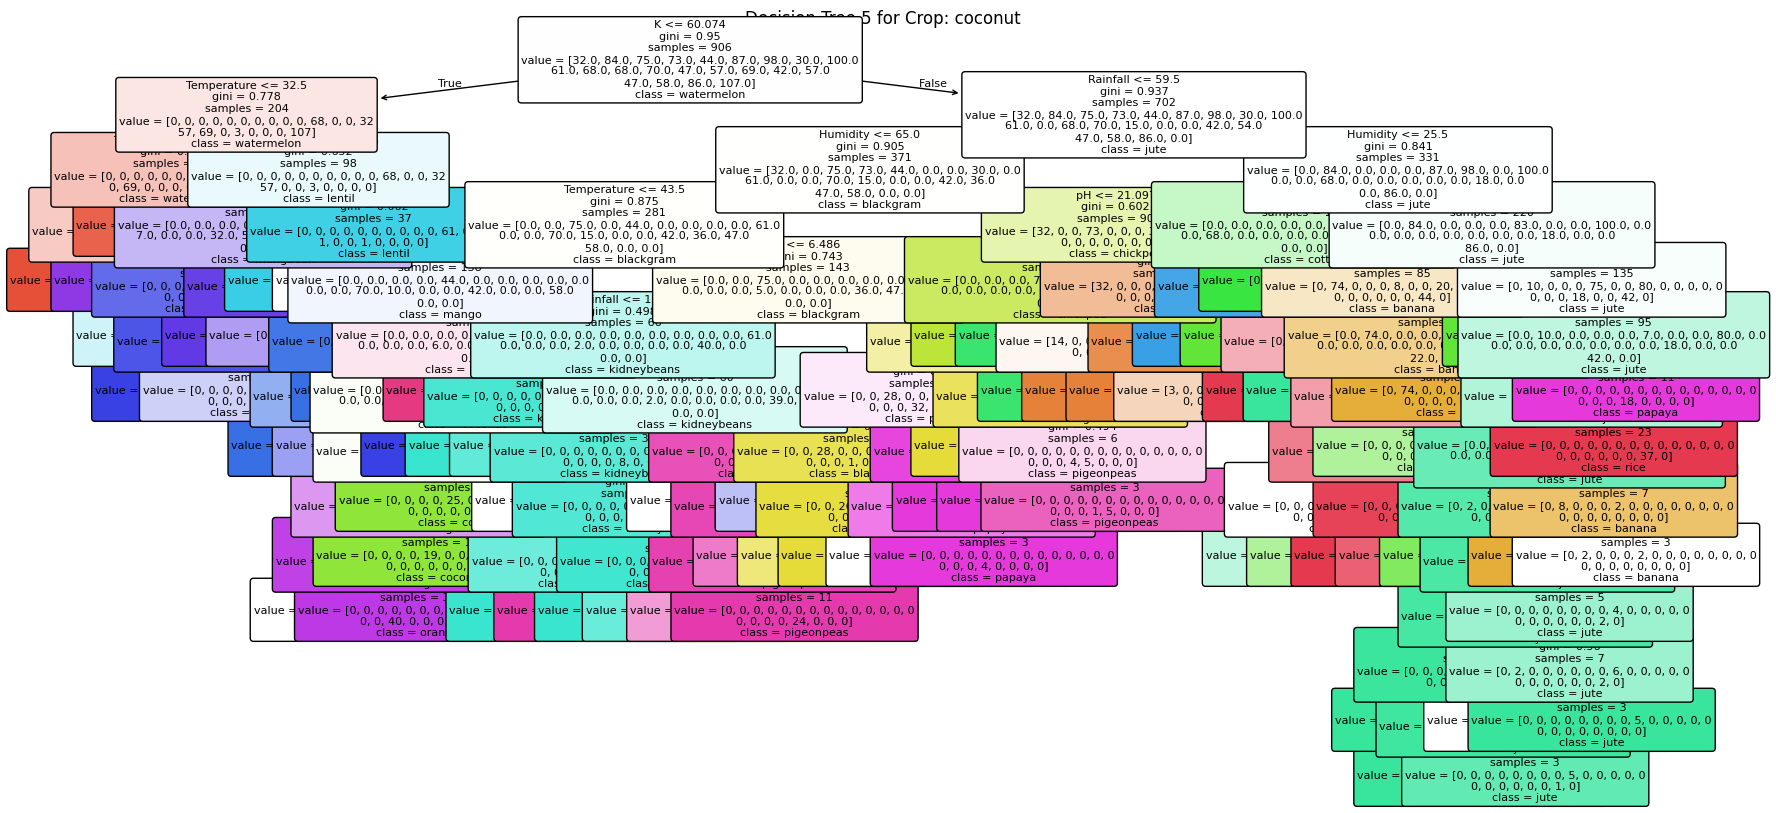

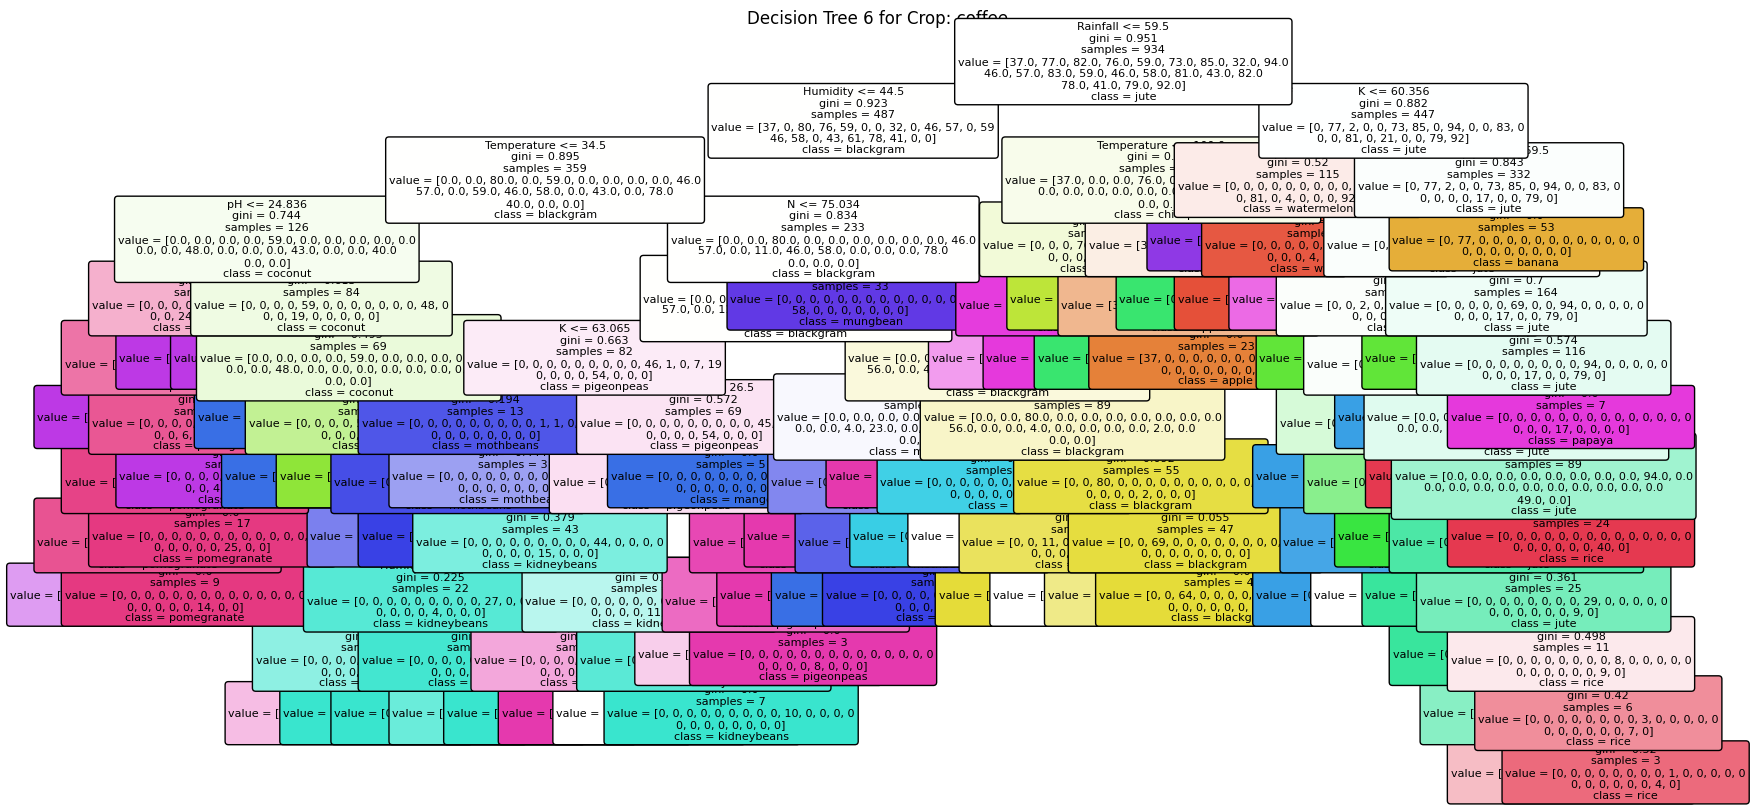

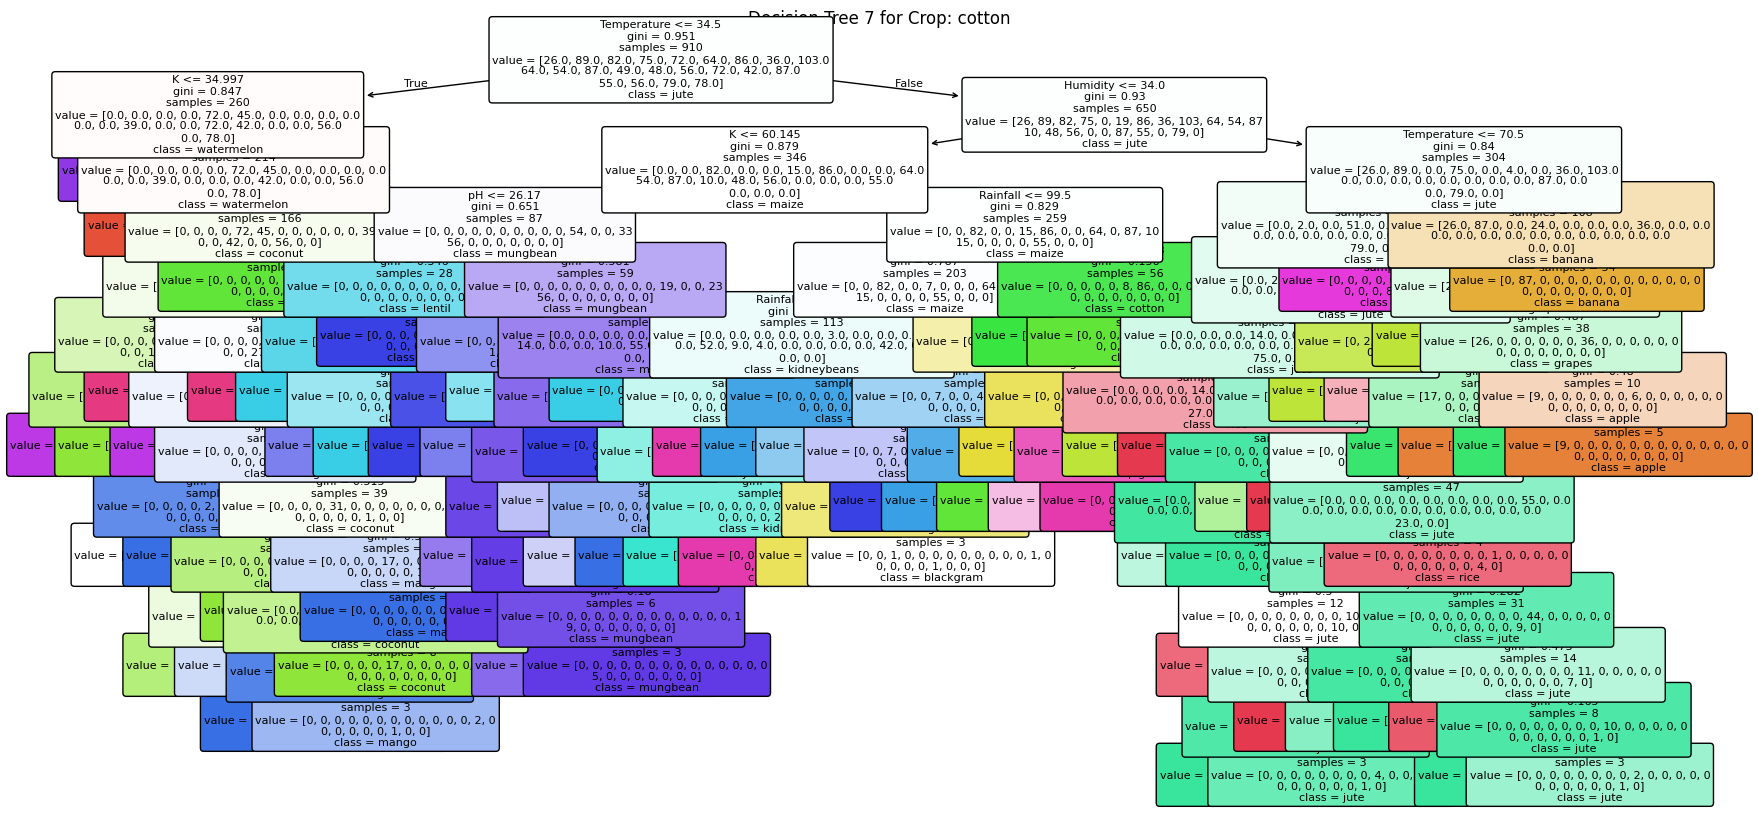

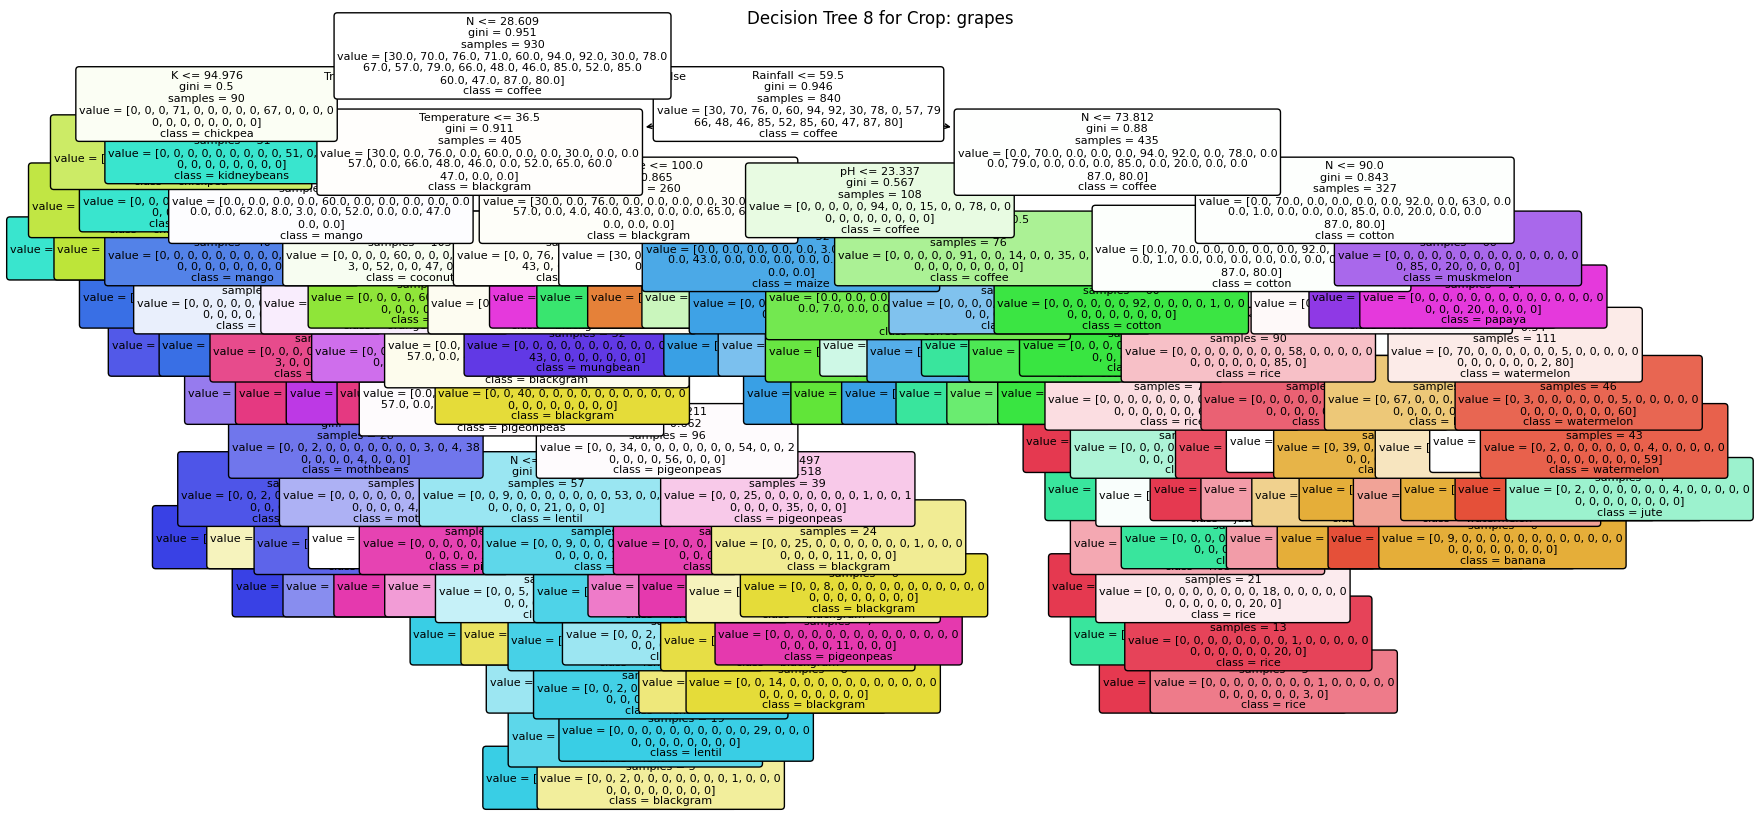

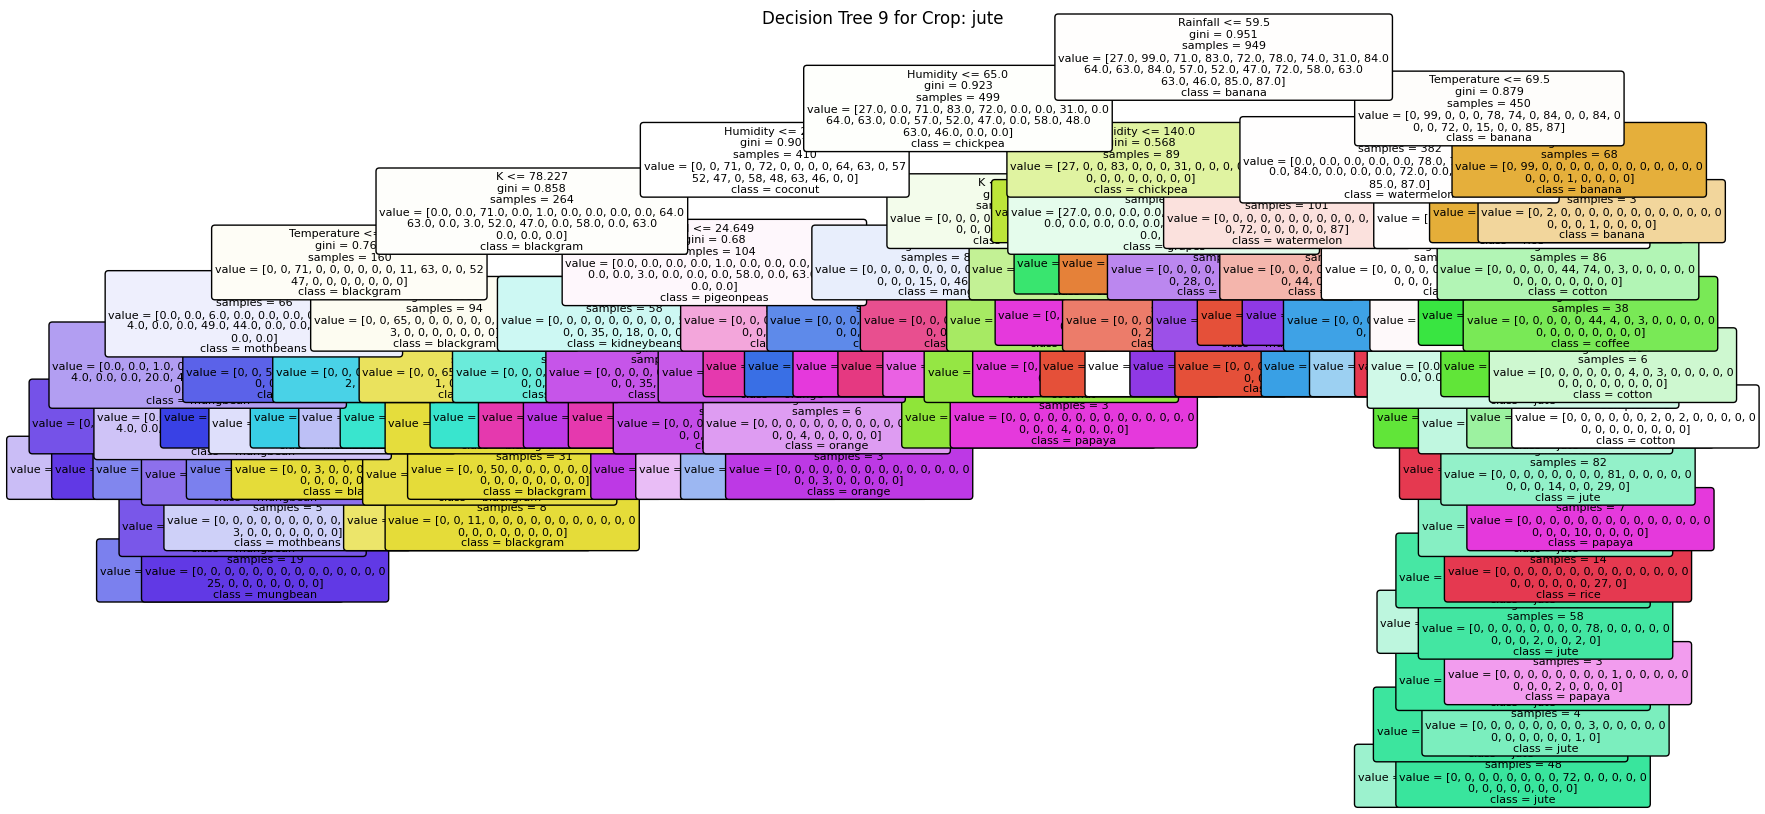

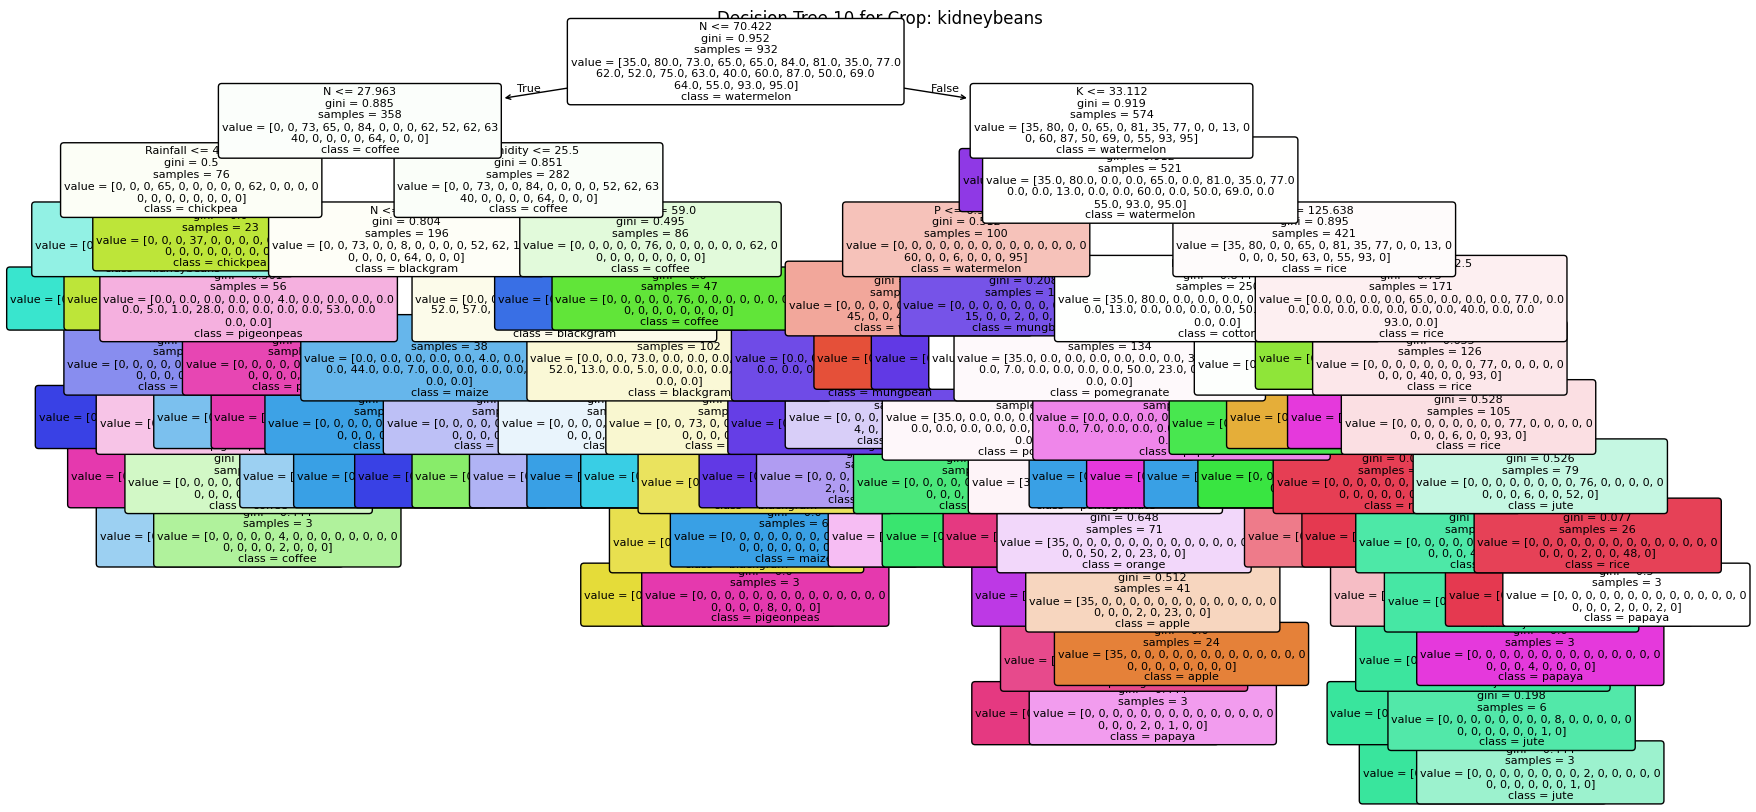

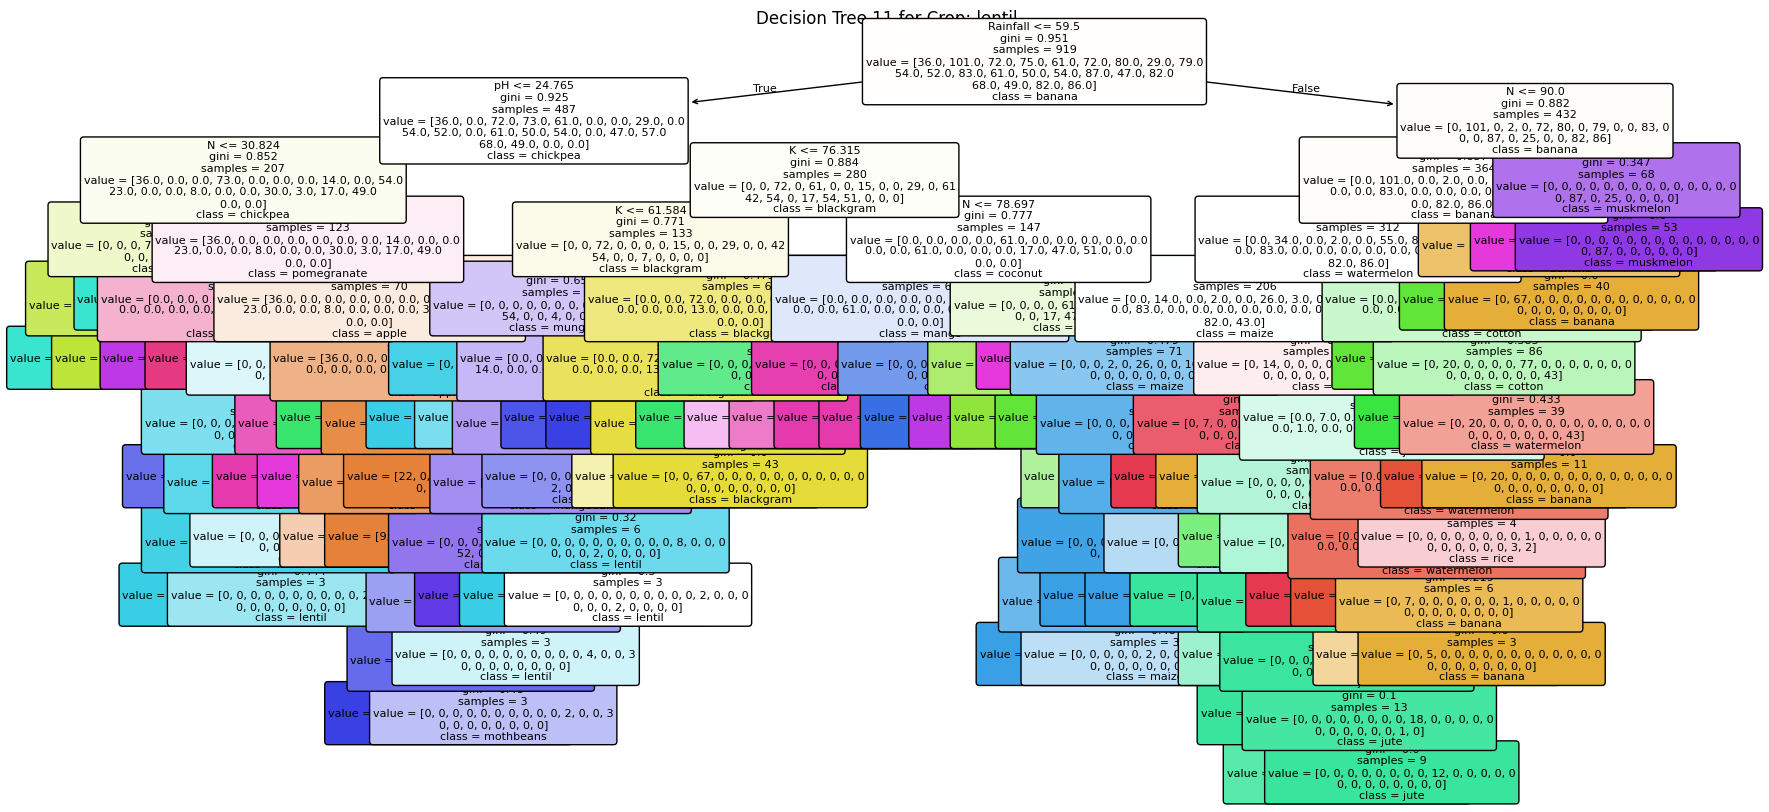

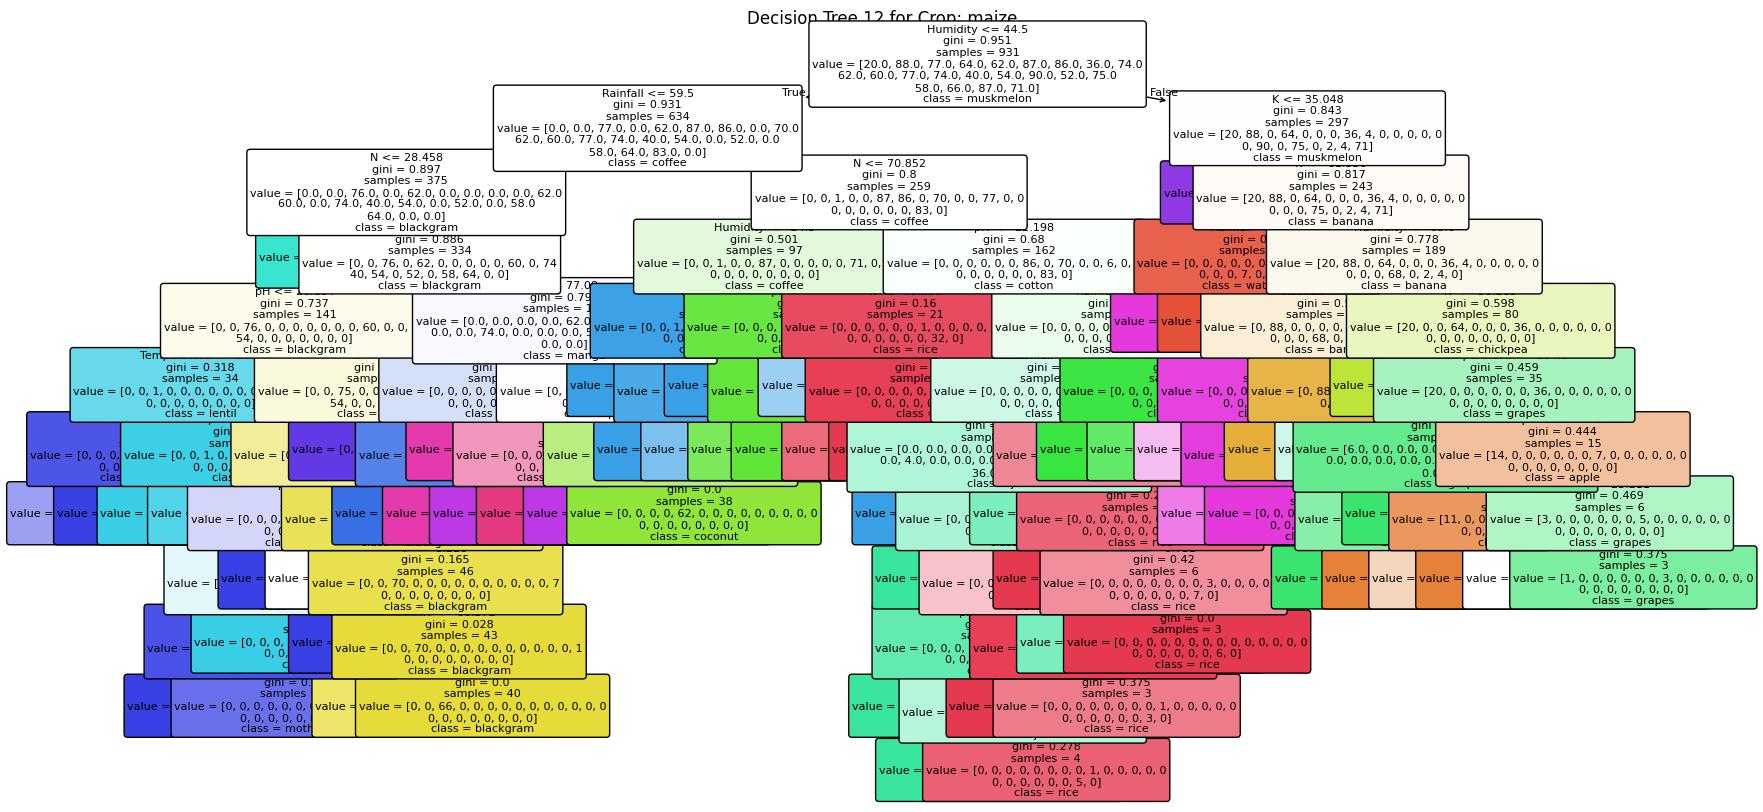

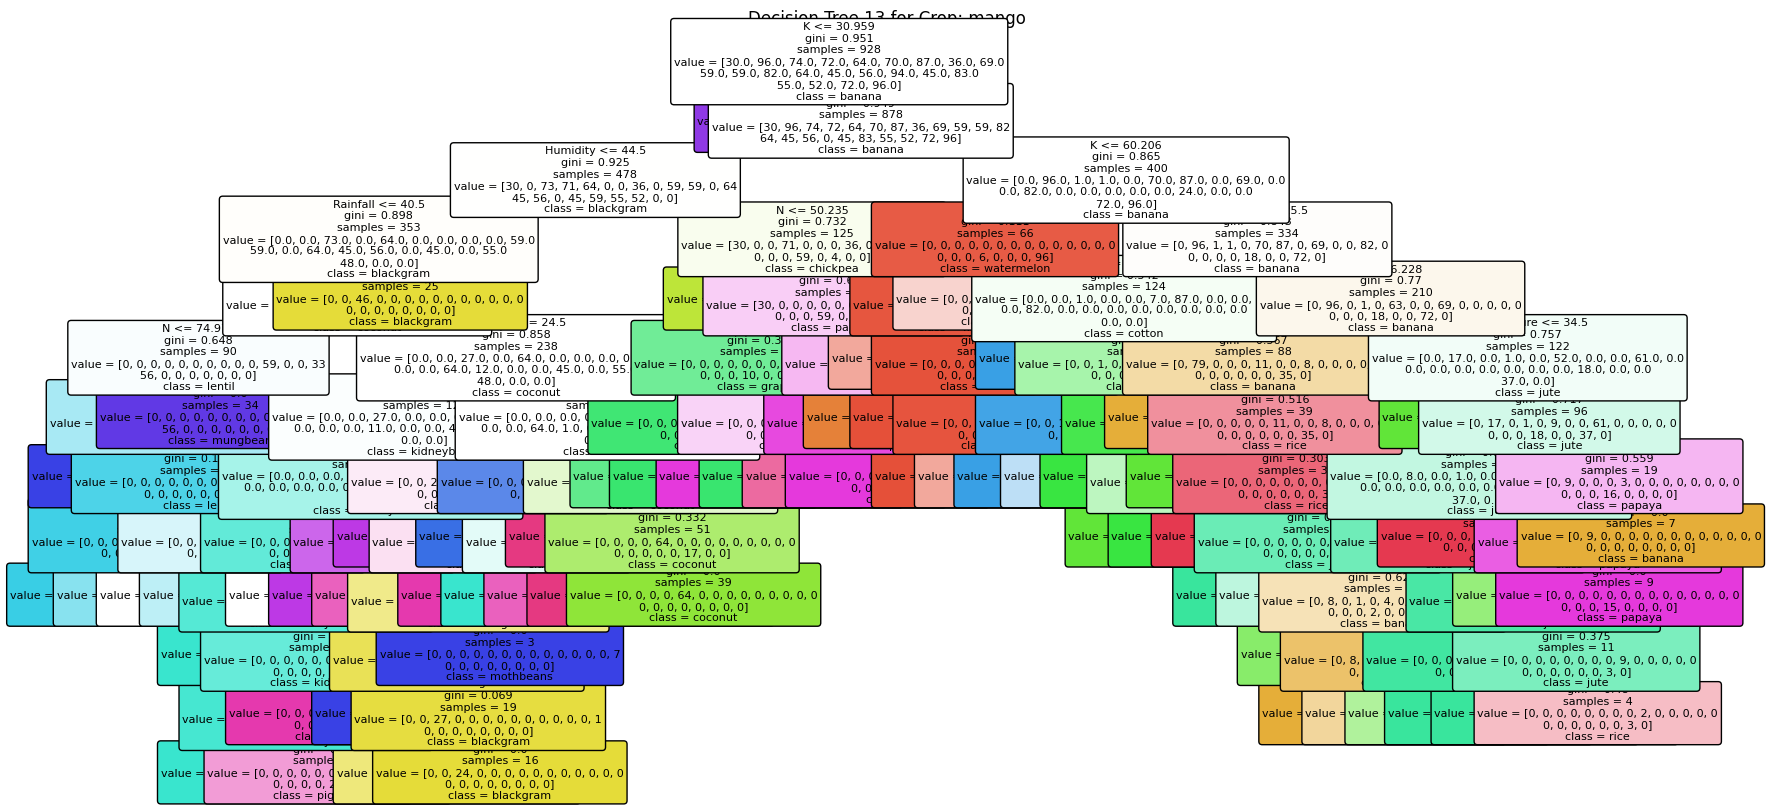

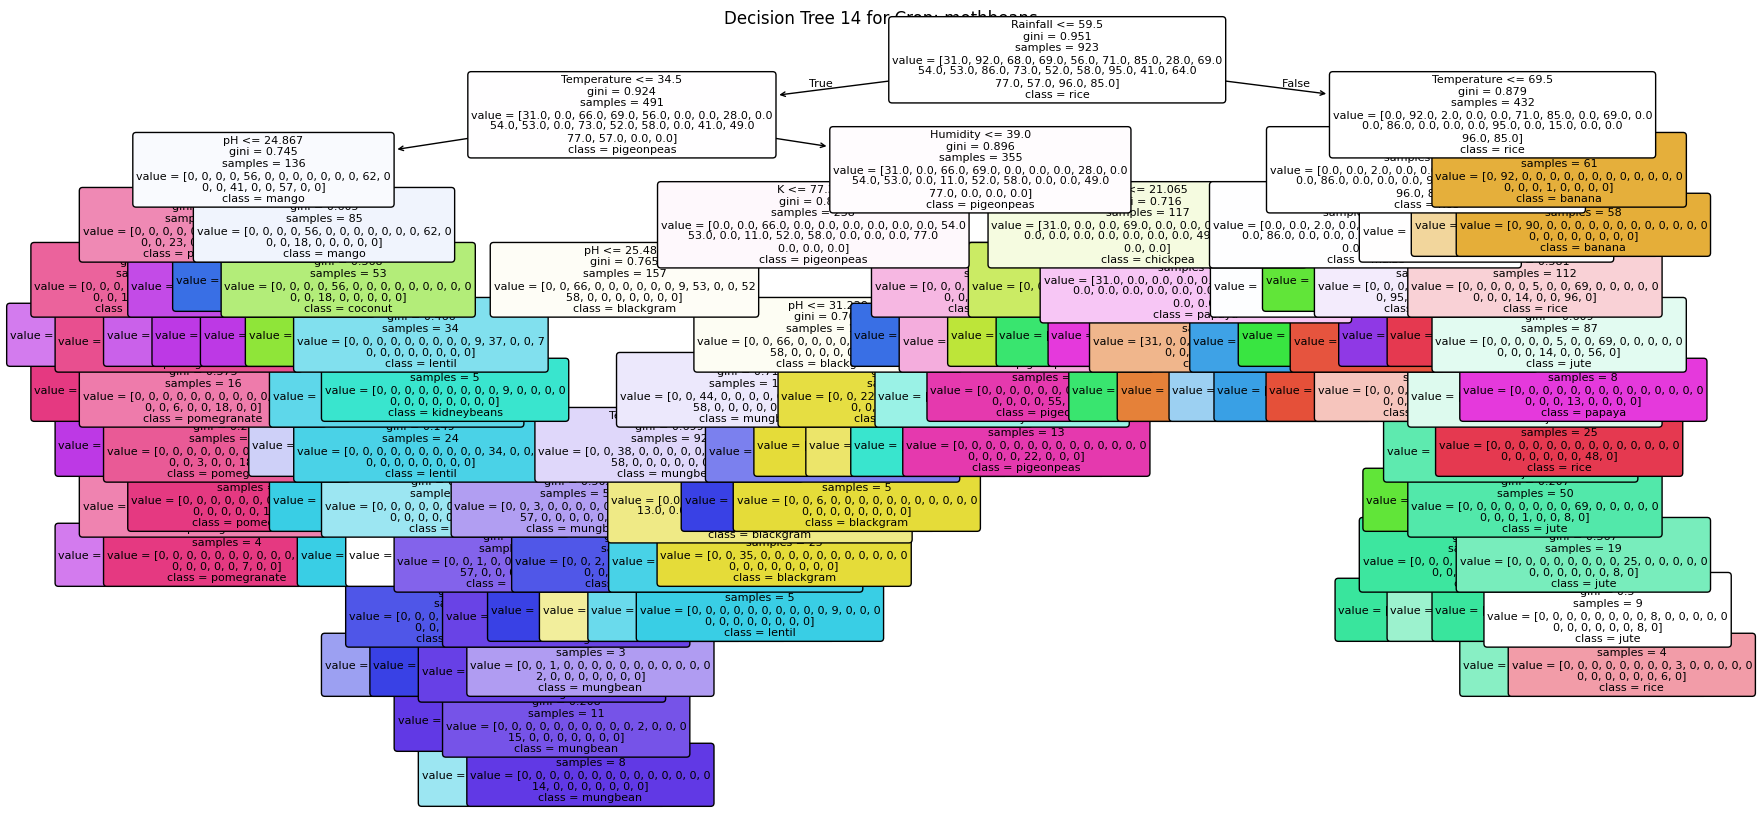

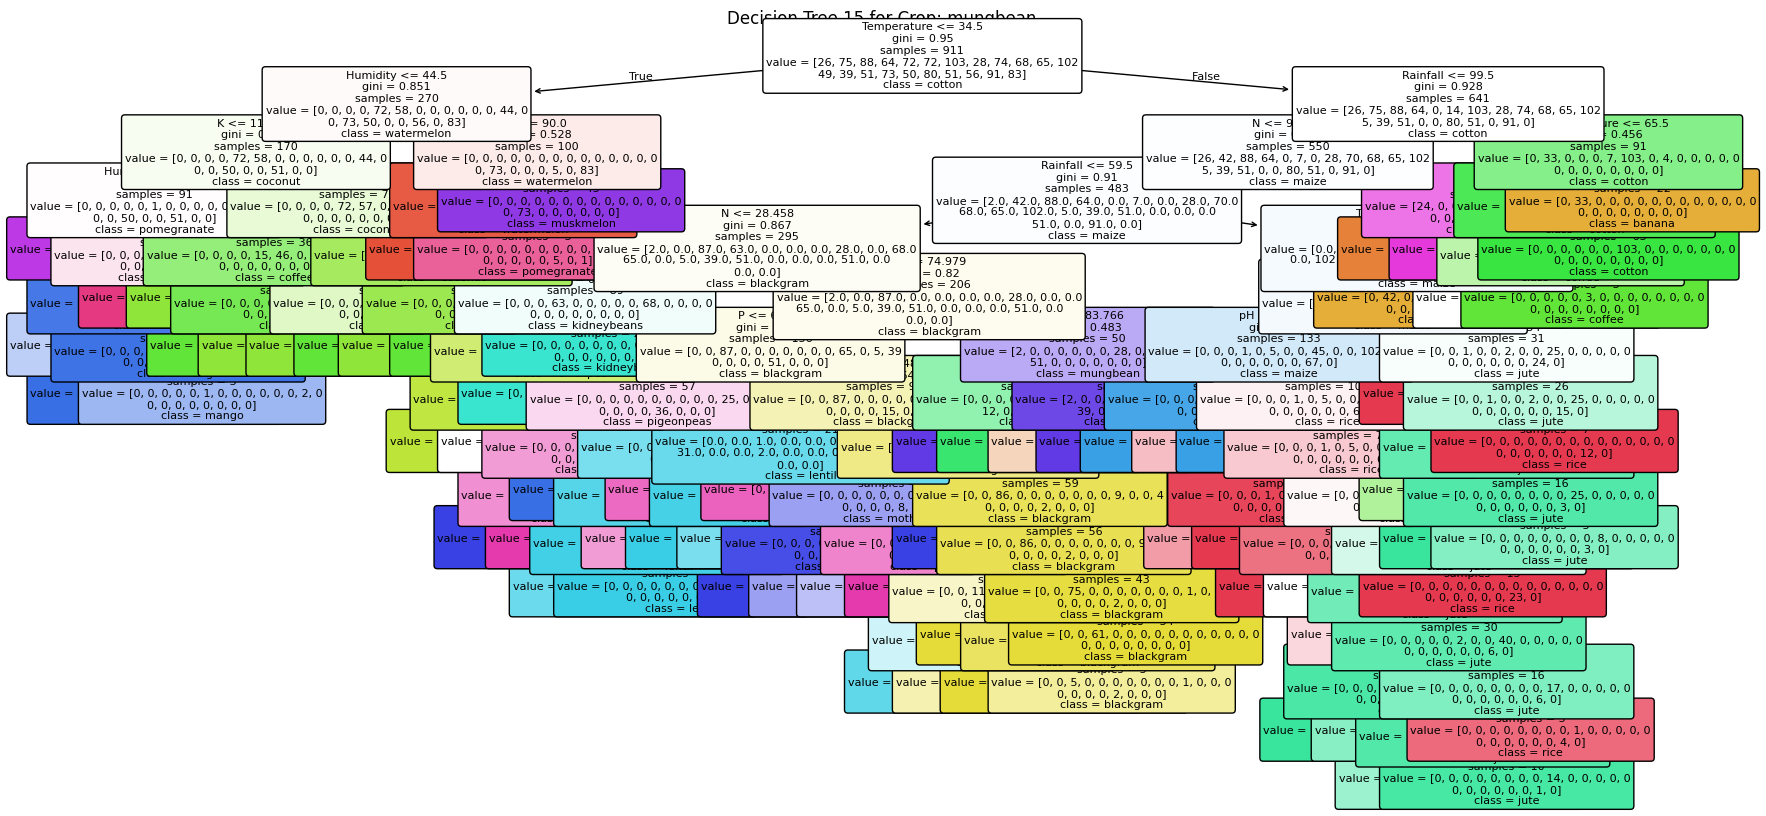

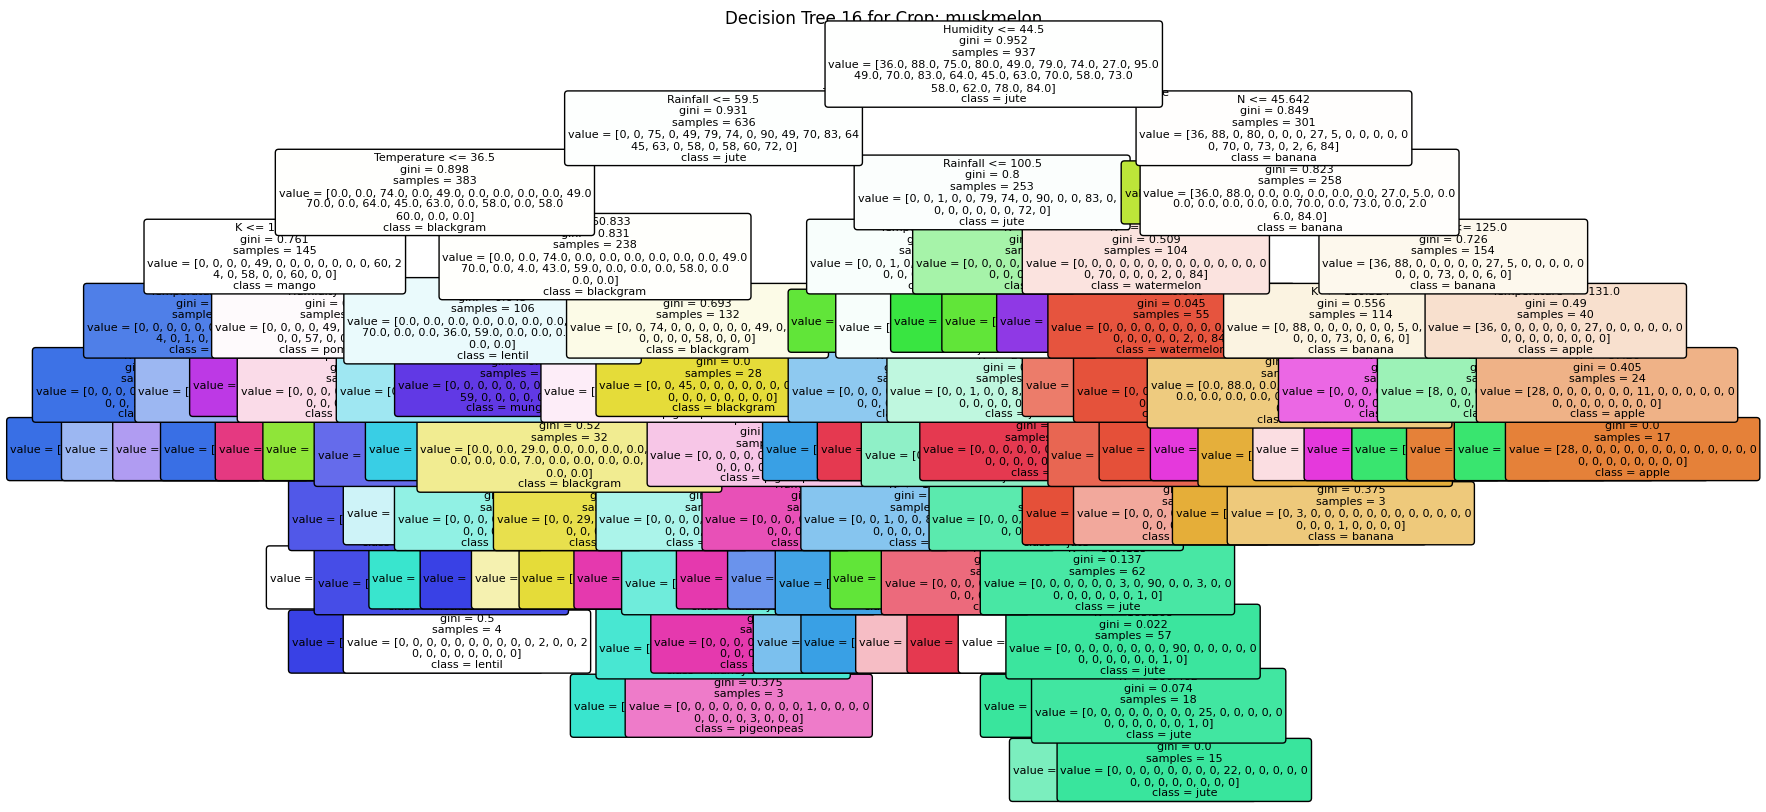

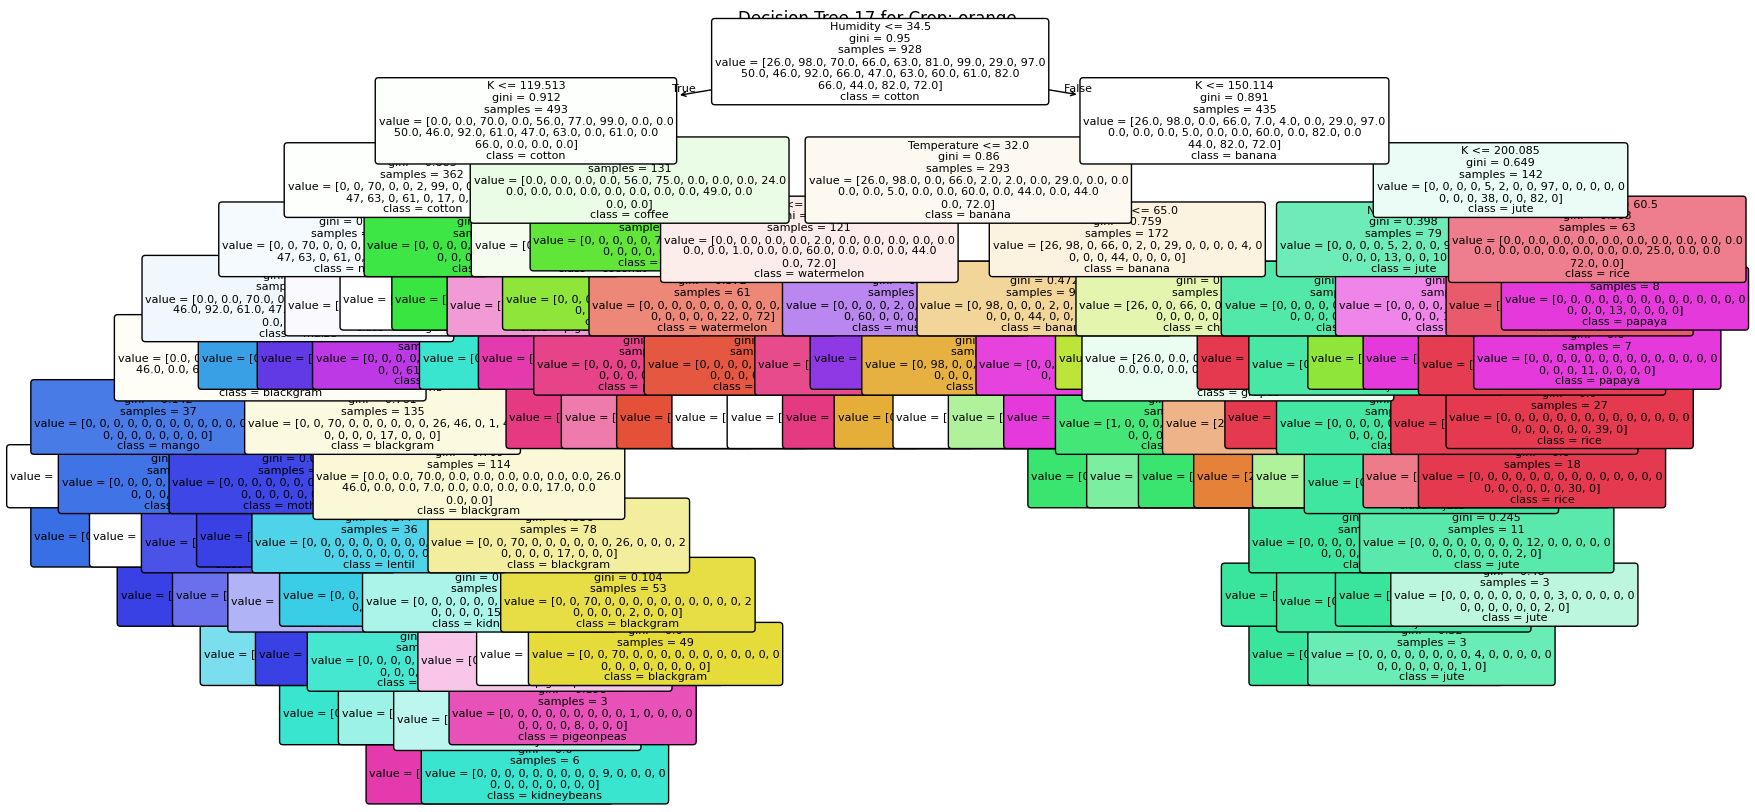

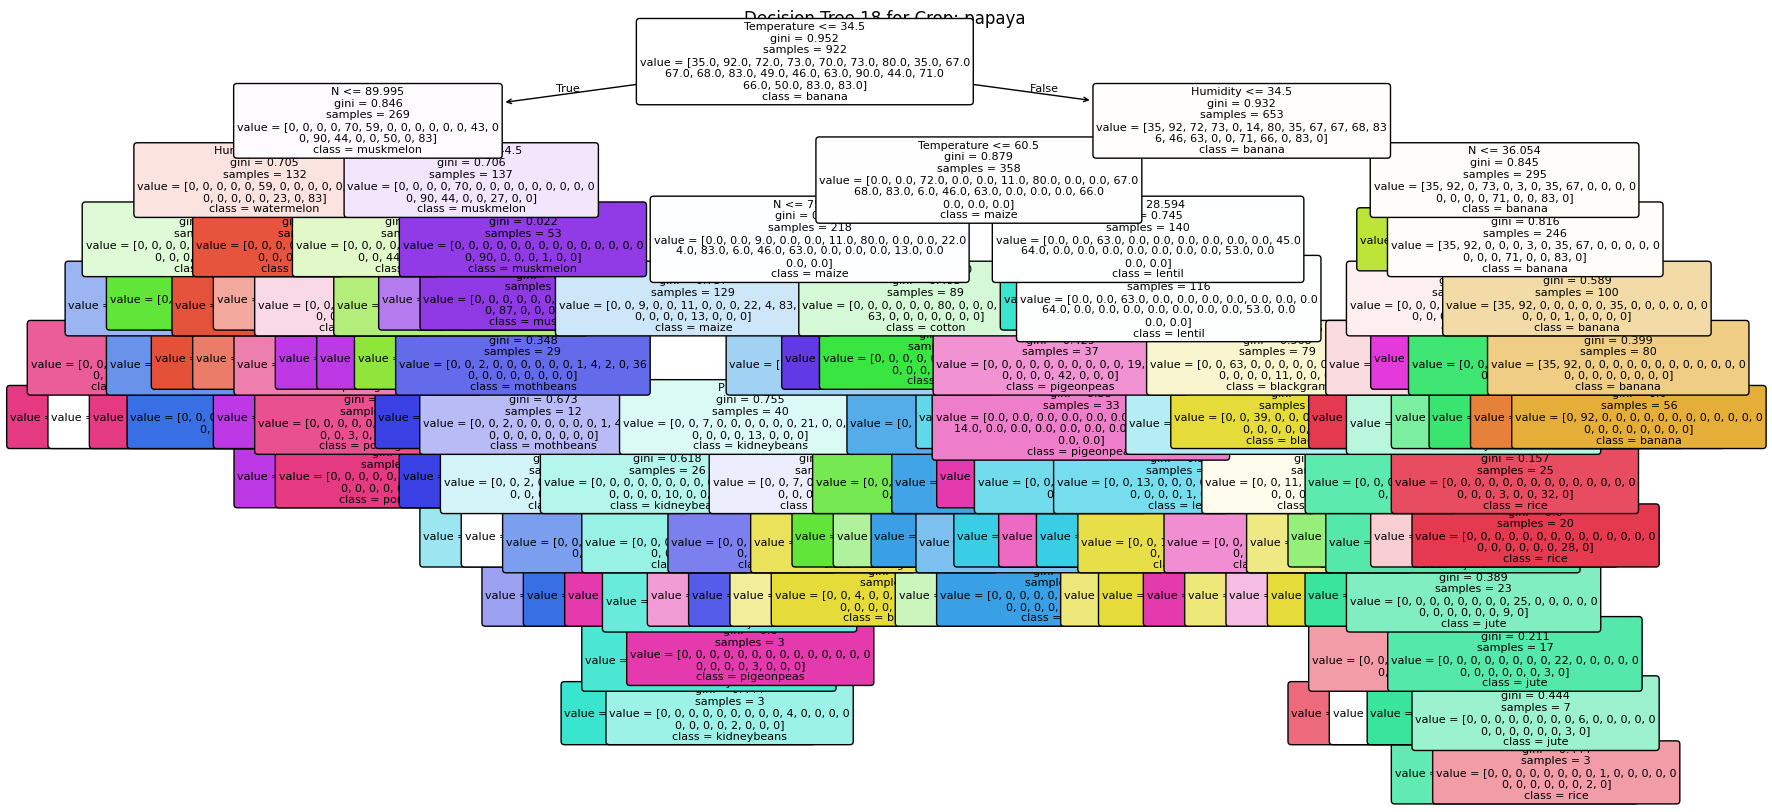

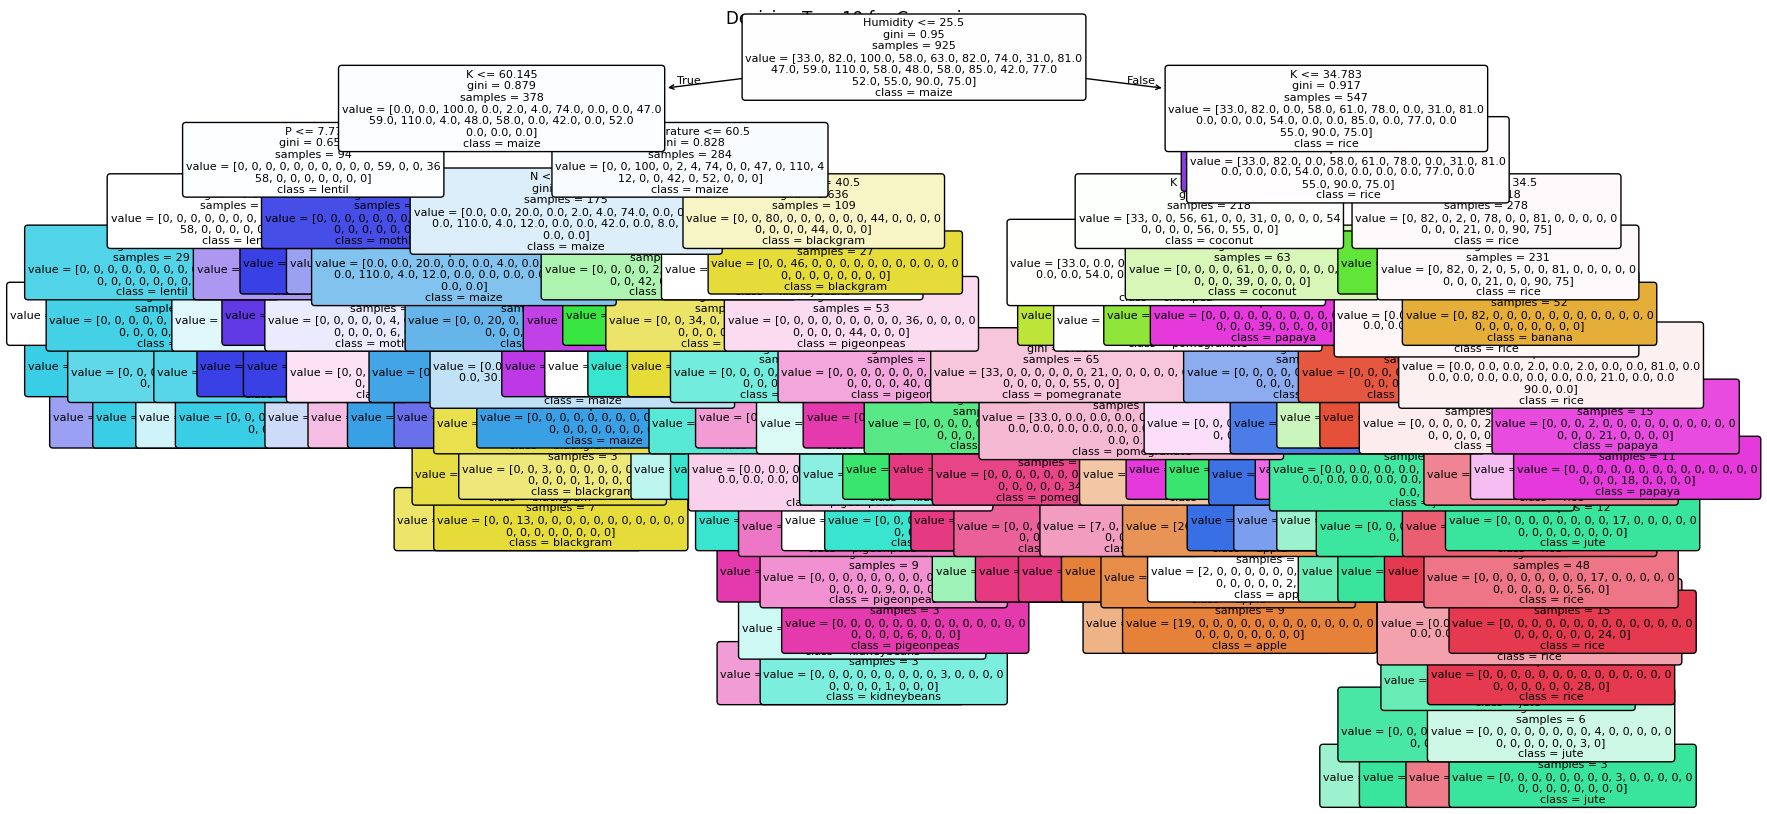

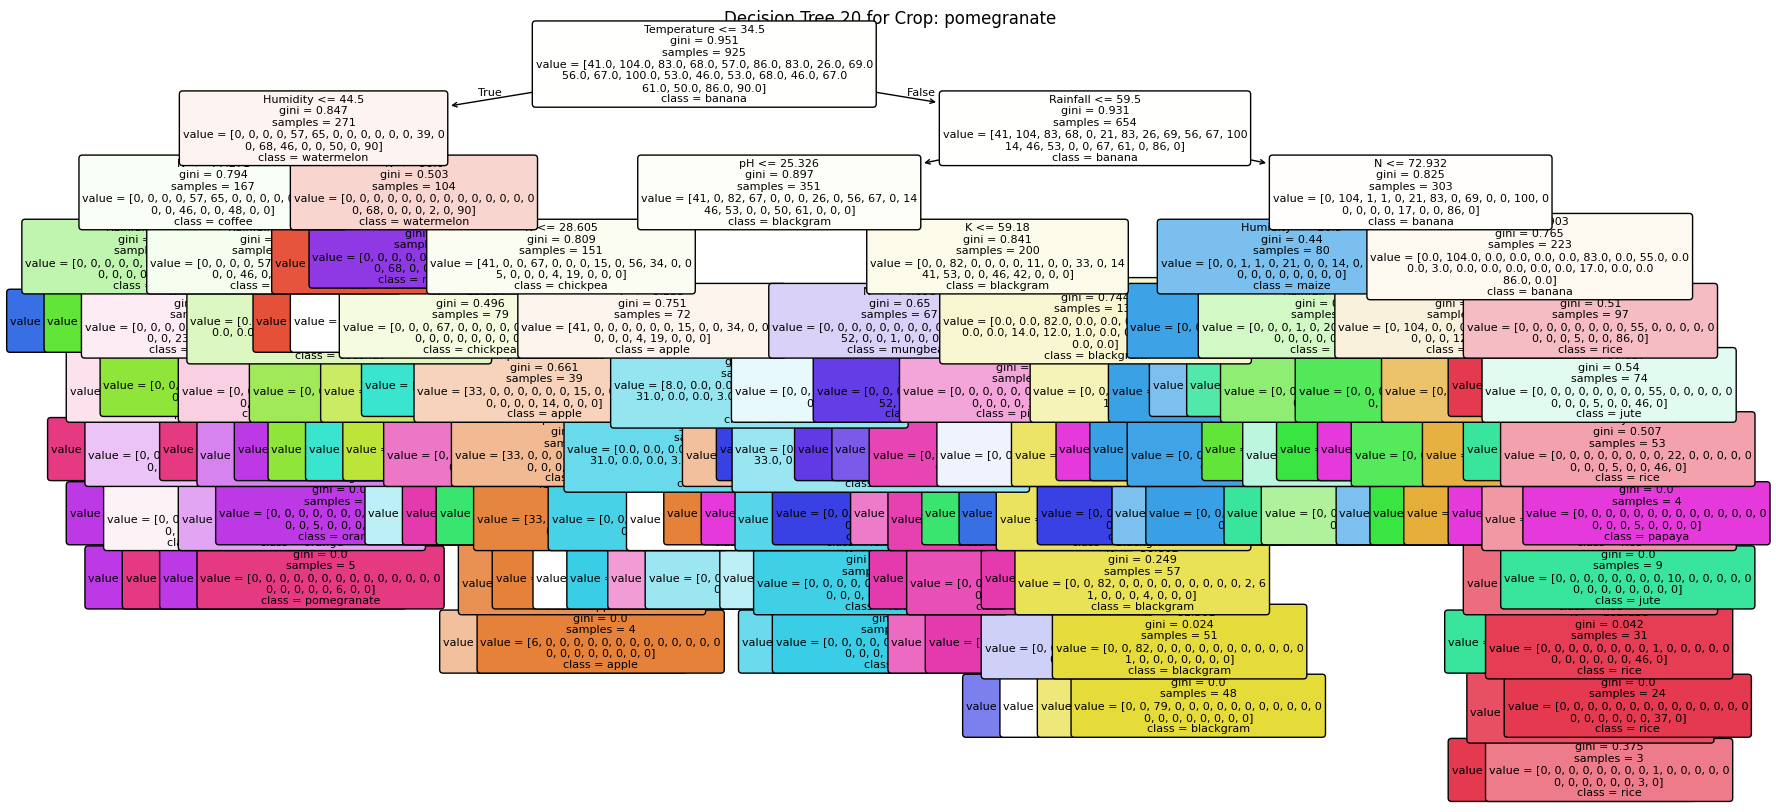

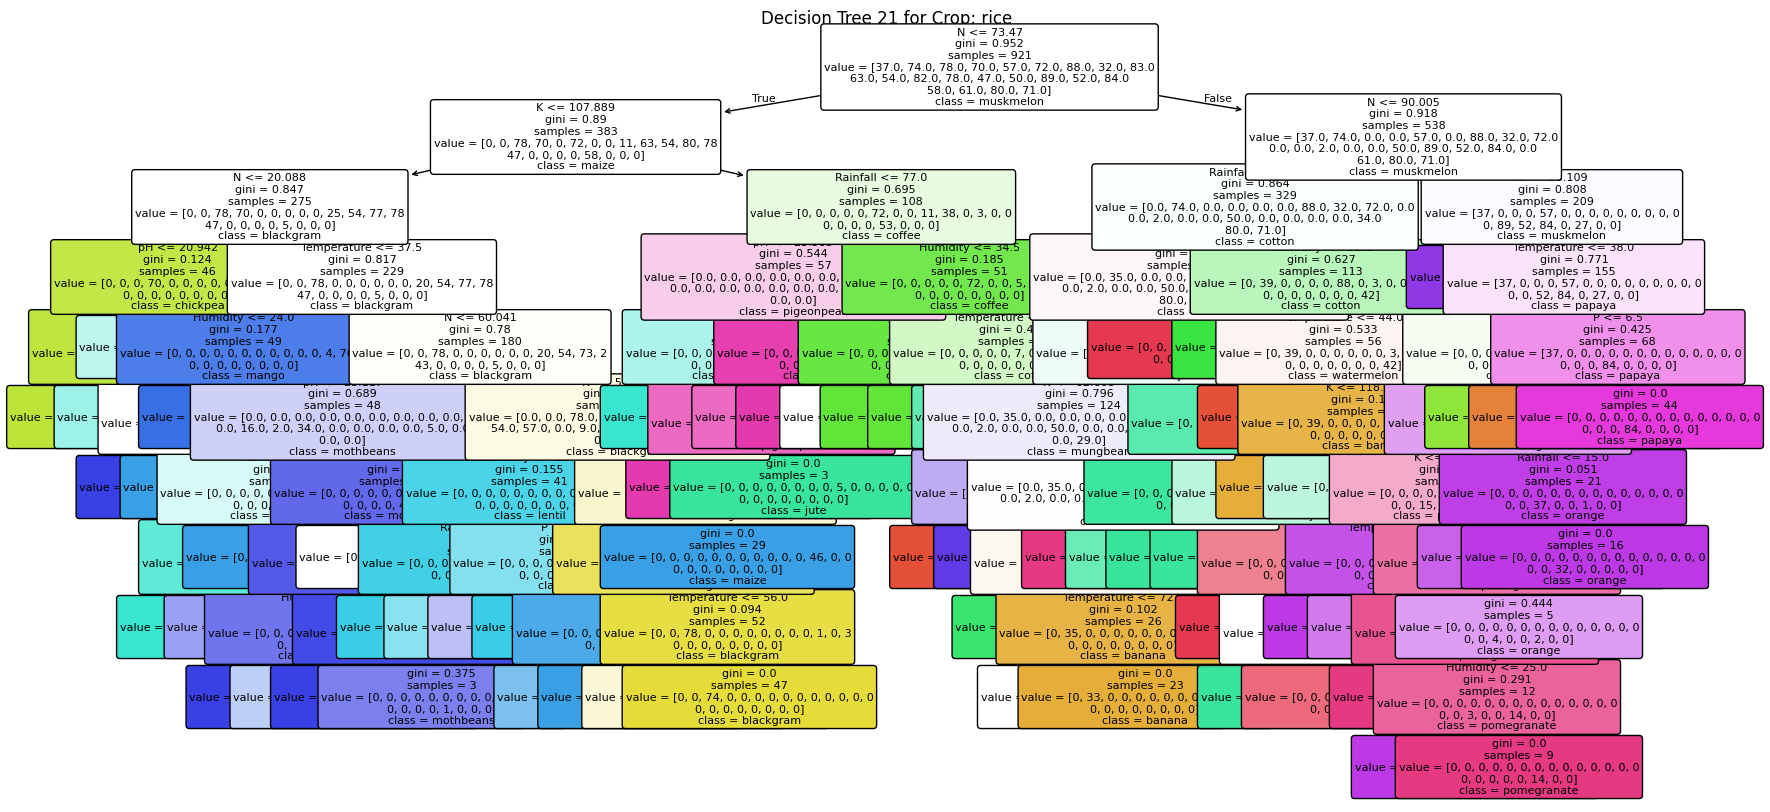

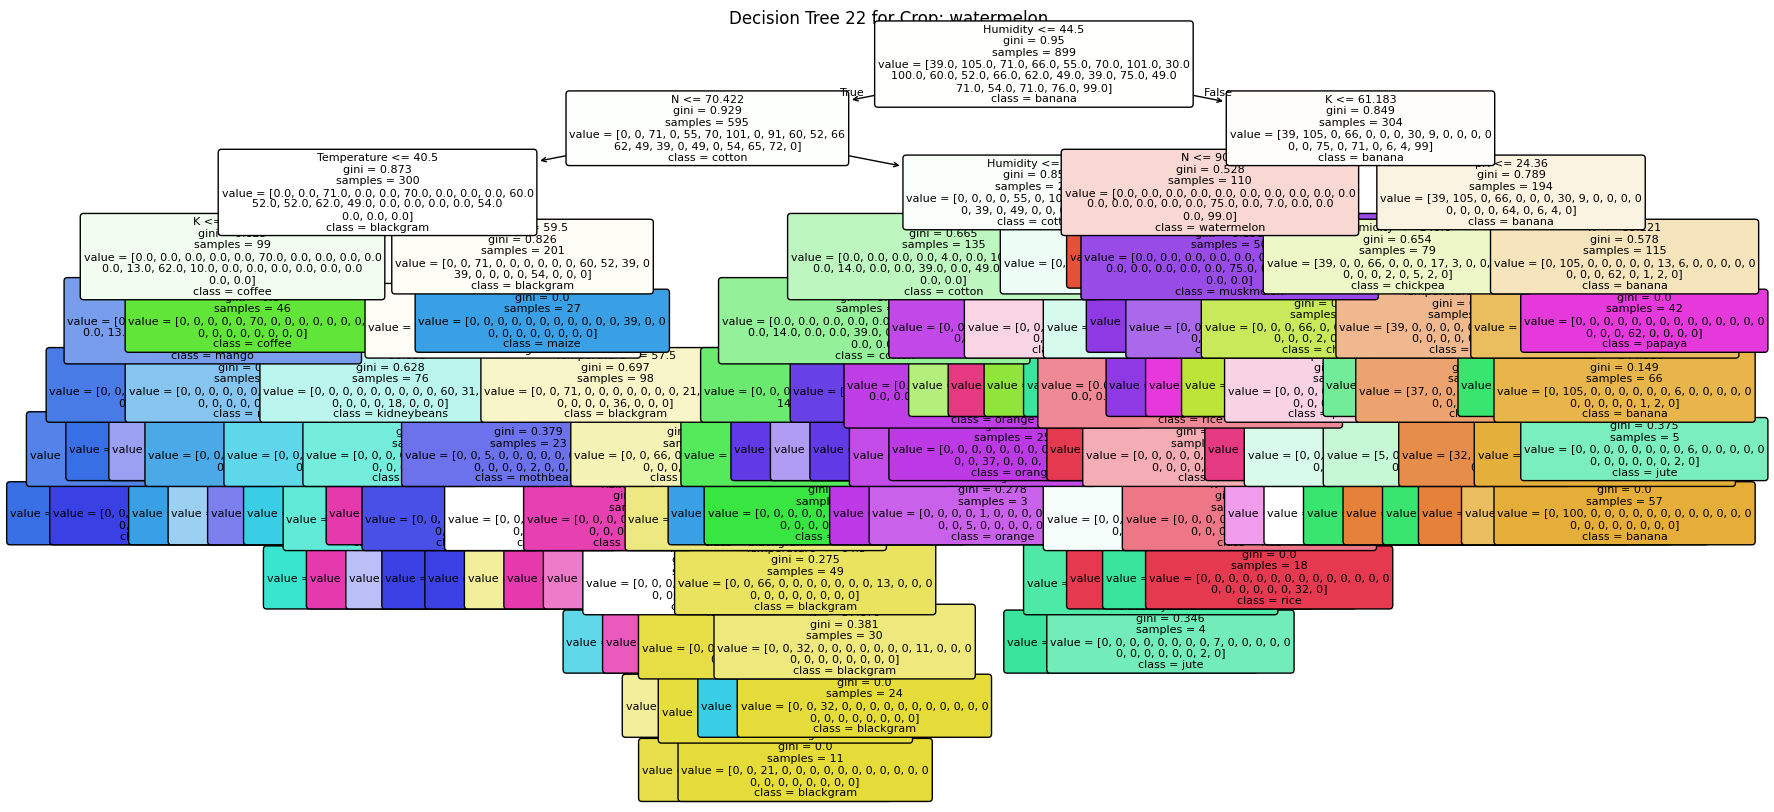

Optimized Crop Recommendation Model Saved.


In [2]:
# Install necessary libraries
!pip install pandas scikit-learn joblib matplotlib seaborn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.tree import plot_tree

# Load Dataset
crop_data = pd.read_csv("Crop_recommendation.csv")

# **Step 1: Feature Engineering & Rule-Based Data Preprocessing**
# Define realistic crop-growing conditions based on domain knowledge
def filter_unrealistic_conditions(df):
    # Rule 1: Remove records with extreme nutrient values
    df = df[(df["N"] >= 10) & (df["N"] <= 300)]
    df = df[(df["P"] >= 5) & (df["P"] <= 150)]
    df = df[(df["K"] >= 5) & (df["K"] <= 200)]
    
    # Rule 2: Keep pH values within realistic agricultural limits
    df = df[(df["ph"] >= 4.5) & (df["ph"] <= 8.5)]
    
    # Rule 3: Ensure temperature and humidity values are in a normal range
    df = df[(df["temperature"] >= 5) & (df["temperature"] <= 45)]
    df = df[(df["humidity"] >= 10) & (df["humidity"] <= 100)]
    
    # Rule 4: Remove extreme outliers in Rainfall
    df = df[(df["rainfall"] >= 20) & (df["rainfall"] <= 400)]
    
    return df

# Apply rule-based filtering to remove unrealistic values
crop_data = filter_unrealistic_conditions(crop_data)

# **Step 2: Prepare Dataset**
X = crop_data.drop(columns=['label'])
y = crop_data['label']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 3: Train an Improved Random Forest Model**
# Fine-tune hyperparameters:
crop_model = RandomForestClassifier(
    n_estimators=300,        # Increase trees for better learning
    max_depth=15,            # Limit depth to avoid overfitting
    min_samples_split=5,     # Avoid splitting small nodes
    min_samples_leaf=3,      # Ensure at least 3 samples per leaf
    random_state=42,
    n_jobs=-1                # Use all CPU cores for training speedup
)

# Train the model
crop_model.fit(X_train, y_train)

# **Step 4: Feature Importance Analysis**
# Find the most important features affecting predictions
feature_importance = crop_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Crop Prediction Features")
plt.title("Feature Importance in Crop Prediction Model")
plt.show()

# **Step 5: Make Predictions**
y_pred = crop_model.predict(X_test)

# **Step 6: Evaluate Model Performance**
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Crop Recommendation Model Accuracy: {accuracy * 100:.2f}%")

# **Classification Report**
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# **Confusion Matrix**
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Optimized Crop Recommendation')
plt.show()

# **Visualizing Multiple Decision Trees for Different Crops**
unique_crops = np.unique(y)
num_trees_to_display = min(len(unique_crops), len(crop_model.estimators_))  # Display up to the number of crops or trees

for i in range(num_trees_to_display):
    plt.figure(figsize=(20, 10))
    single_tree = crop_model.estimators_[i]  # Get one tree from the Random Forest
    dominant_class = unique_crops[i]  # Assign each tree to a unique crop class
    
    plot_tree(single_tree, 
              feature_names=['Rainfall', 'Temperature', 'Humidity', 'pH', 'N', 'P', 'K'], 
              class_names=np.unique(y), 
              filled=True, 
              rounded=True, 
              fontsize=8)
    plt.title(f"Decision Tree {i+1} for Crop: {dominant_class}")
    plt.show()

# **Step 7: Save the Model**
joblib.dump(crop_model, "optimized_crop_recommendation_model.pkl")
print("Optimized Crop Recommendation Model Saved.")
